In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.models import Sequential,load_model
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset=pd.read_csv('T1.csv')

In [3]:
dataset.head(10)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613
6,01 01 2018 01:00,447.605713,5.793008,557.372363,266.163605
7,01 01 2018 01:10,387.242188,5.306050,414.898179,257.949493
8,01 01 2018 01:20,463.651215,5.584629,493.677652,253.480698
9,01 01 2018 01:30,439.725708,5.523228,475.706783,258.723785


In [4]:
dataset.shape

(50530, 5)

In [5]:
features_intake = ['LV ActivePower (kW)','Wind Speed (m/s)','Theoretical_Power_Curve (KWh)','Wind Direction (°)']

In [6]:
features = dataset[features_intake]
features.index = dataset['Date/Time']
features.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,,,,
01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019991BE7E88>,
      dtype=object)

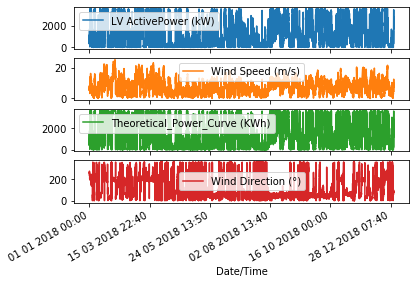

In [7]:
features.plot(subplots=True)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [9]:
dataset.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [10]:
dataset.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

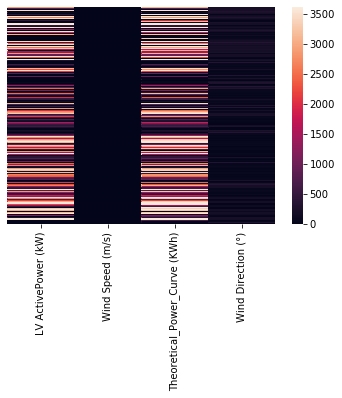

In [11]:
sns.heatmap(dataset[['LV ActivePower (kW)','Wind Speed (m/s)','Theoretical_Power_Curve (KWh)','Wind Direction (°)']],yticklabels=False)

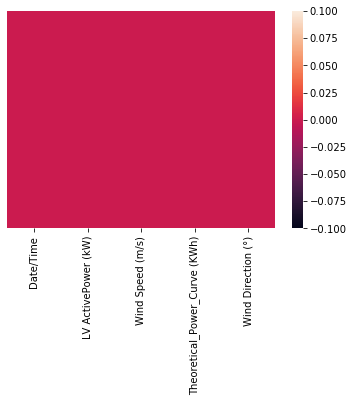

In [12]:
sns.heatmap(dataset.isnull(),yticklabels=False)

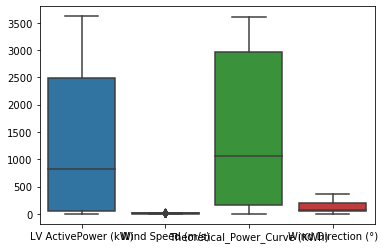

In [13]:
sns.boxplot(data=dataset)

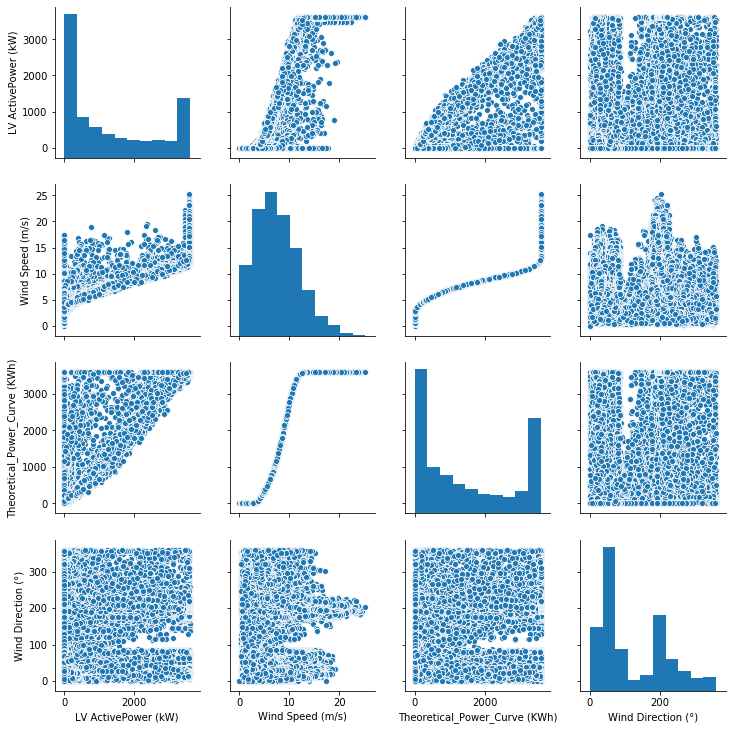

In [14]:
sns.pairplot(dataset[['LV ActivePower (kW)','Wind Speed (m/s)','Theoretical_Power_Curve (KWh)','Wind Direction (°)']],diag_kind="auto")

In [15]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler(feature_range=(0,1))
sca=MinMaxScaler(feature_range=(0,1))

In [16]:
dataset = features.values
dataset

array([[ 380.04779053,    5.31133604,  416.32890782,  259.99490356],
       [ 453.76919556,    5.67216682,  519.91751106,  268.64111328],
       [ 306.37658691,    5.2160368 ,  390.90001581,  272.56478882],
       ...,
       [2201.10693359,    8.43535805, 1788.28475526,   84.74250031],
       [2515.6940918 ,    9.42136574, 2418.38250336,   84.2979126 ],
       [2820.46606445,    9.97933197, 2779.18409628,   82.27462006]])

In [17]:
data_in=dataset[:,1:4]
data_out=dataset[:,0]

In [18]:
data_in

array([[   5.31133604,  416.32890782,  259.99490356],
       [   5.67216682,  519.91751106,  268.64111328],
       [   5.2160368 ,  390.90001581,  272.56478882],
       ...,
       [   8.43535805, 1788.28475526,   84.74250031],
       [   9.42136574, 2418.38250336,   84.2979126 ],
       [   9.97933197, 2779.18409628,   82.27462006]])

In [19]:
data_out.shape

(50530,)

In [20]:
data_out=np.reshape(data_out,(-1, 1))

In [21]:
data_out.shape

(50530, 1)

In [22]:
data_out

array([[ 380.04779053],
       [ 453.76919556],
       [ 306.37658691],
       ...,
       [2201.10693359],
       [2515.6940918 ],
       [2820.46606445]])

In [23]:
data_in=scale.fit_transform(data_in)
data_out=scale.fit_transform(data_out)

In [24]:
data_out=np.reshape(data_out,(data_out.shape[0],))

In [25]:
data_out

array([0.10563314, 0.1259914 , 0.08528875, ..., 0.60852085, 0.69539448,
       0.77955763])

In [26]:
data_in

array([[0.21071704, 0.11564692, 0.7222129 ],
       [0.22503231, 0.14442153, 0.74623031],
       [0.20693623, 0.10858334, 0.75712948],
       ...,
       [0.33465661, 0.49674577, 0.23539741],
       [0.37377457, 0.67177292, 0.23416244],
       [0.3959108 , 0.77199558, 0.22854214]])

In [27]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

In [28]:
past_history = 720
future_target = 432
step = 6
train_split=40000

In [29]:
def create_time_steps(length):
    return list(range(-length, 0))

In [30]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

In [31]:
x_train_single, y_train_single = multivariate_data(data_in, data_out, 0,
                                                   train_split, past_history,
                                                   future_target,step,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(data_in, data_out,
                                               train_split, None, past_history,
                                               future_target,step,
                                                single_step=True)

In [32]:
print(x_train_single.shape)
print(y_train_single.shape)
print(x_val_single.shape)
print(y_val_single.shape)

(39280, 120, 3)
(39280,)
(9378, 120, 3)
(9378,)


In [33]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (120, 3)


In [34]:
batch_size= 64
buffer_size= len(x_train_single)
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(batch_size).repeat()

In [35]:
for i,j in train_data_single.take(1):
    print(i.numpy().shape)

(64, 120, 3)


In [59]:
model =Sequential()
model.add(tf.keras.layers.LSTM(120,input_shape=x_train_single.shape[-2:],return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(72, activation='relu',return_sequences=True))
model.add(Dropout(0.35))
model.add(LSTM(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(72,activation='linear'))
model.compile(optimizer=tf.keras.optimizers.Adam(lr=3e-4), loss='mae')

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 120, 120)          59520     
_________________________________________________________________
dropout_9 (Dropout)          (None, 120, 120)          0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 120, 72)           55584     
_________________________________________________________________
dropout_10 (Dropout)         (None, 120, 72)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                13440     
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 72)               

In [61]:
tf.random.set_seed(13)

In [62]:
history = model.fit(train_data_single, epochs=5,
                                            steps_per_epoch=buffer_size//batch_size,
                                            validation_data=val_data_single,
                                            validation_steps=len(x_val_single)//batch_size)

Train for 613 steps, validate for 146 steps
Epoch 1/5
613/613 [==============================] - 664s 1s/step - loss: 0.5246 - val_loss: 0.3467
Epoch 2/5
613/613 [==============================] - 623s 1s/step - loss: 0.2935 - val_loss: 0.3454
Epoch 3/5
613/613 [==============================] - 647s 1s/step - loss: 0.2911 - val_loss: 0.3439
Epoch 4/5
613/613 [==============================] - 642s 1s/step - loss: 0.2899 - val_loss: 0.3425
Epoch 5/5
613/613 [==============================] - 640s 1s/step - loss: 0.2891 - val_loss: 0.3404


In [63]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()
    plt.show()

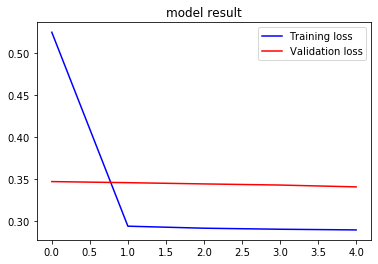

In [64]:
plot_train_history(history,'model result')

In [65]:
!mkdir saved_model_result
model.save('saved_model_result/final_model.h5')

In [66]:
model=load_model('saved_model_result/final_model.h5')

In [67]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 120, 120)          59520     
_________________________________________________________________
dropout_9 (Dropout)          (None, 120, 120)          0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 120, 72)           55584     
_________________________________________________________________
dropout_10 (Dropout)         (None, 120, 72)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                13440     
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 72)               

In [68]:
x_train=np.reshape(x_train_single[0],(1,120,3))

In [69]:
x_train.shape

(1, 120, 3)

In [70]:
x=model.predict(x_train)
print(x)

[[0.17940478 0.17411815 0.17089525 0.17302486 0.1830339  0.18840536
  0.18643191 0.17092413 0.1610191  0.17278863 0.17543514 0.17522576
  0.17339113 0.18681918 0.18110251 0.1730026  0.17686865 0.18044394
  0.17910697 0.1775729  0.18607384 0.17235588 0.17032853 0.1810031
  0.18316406 0.16944233 0.16025168 0.17213416 0.15893513 0.16313836
  0.18143186 0.17594936 0.17862192 0.17499262 0.1742369  0.17588636
  0.16944541 0.1852352  0.1917983  0.16662592 0.16689365 0.17319578
  0.16790308 0.17303397 0.17751357 0.16916591 0.18114585 0.17514075
  0.18946815 0.17283006 0.18837854 0.16830614 0.18370564 0.1742723
  0.17723607 0.17630365 0.16879597 0.16935071 0.16917627 0.18351932
  0.16203171 0.17313334 0.17386225 0.1820148  0.17473331 0.16791622
  0.17864607 0.17202538 0.15432826 0.1654801  0.17024195 0.17929426]]


In [71]:
data=scale.inverse_transform(x)[0][0:]

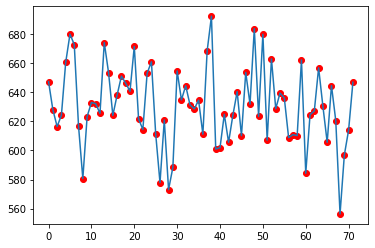

In [72]:
plt.plot(data,'or')
plt.plot(data)